In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv("/content/dataset.csv")
data_severity=pd.read_csv("/content/Symptom-severity.csv")

In [ ]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
data.shape

(4920, 18)

In [ ]:
np.sum(data.isnull())

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

**Severity**

In [ ]:
data_severity.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [ ]:
data_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
data_severity.shape

(133, 2)

Text(0.5, 0, 'name of disease')

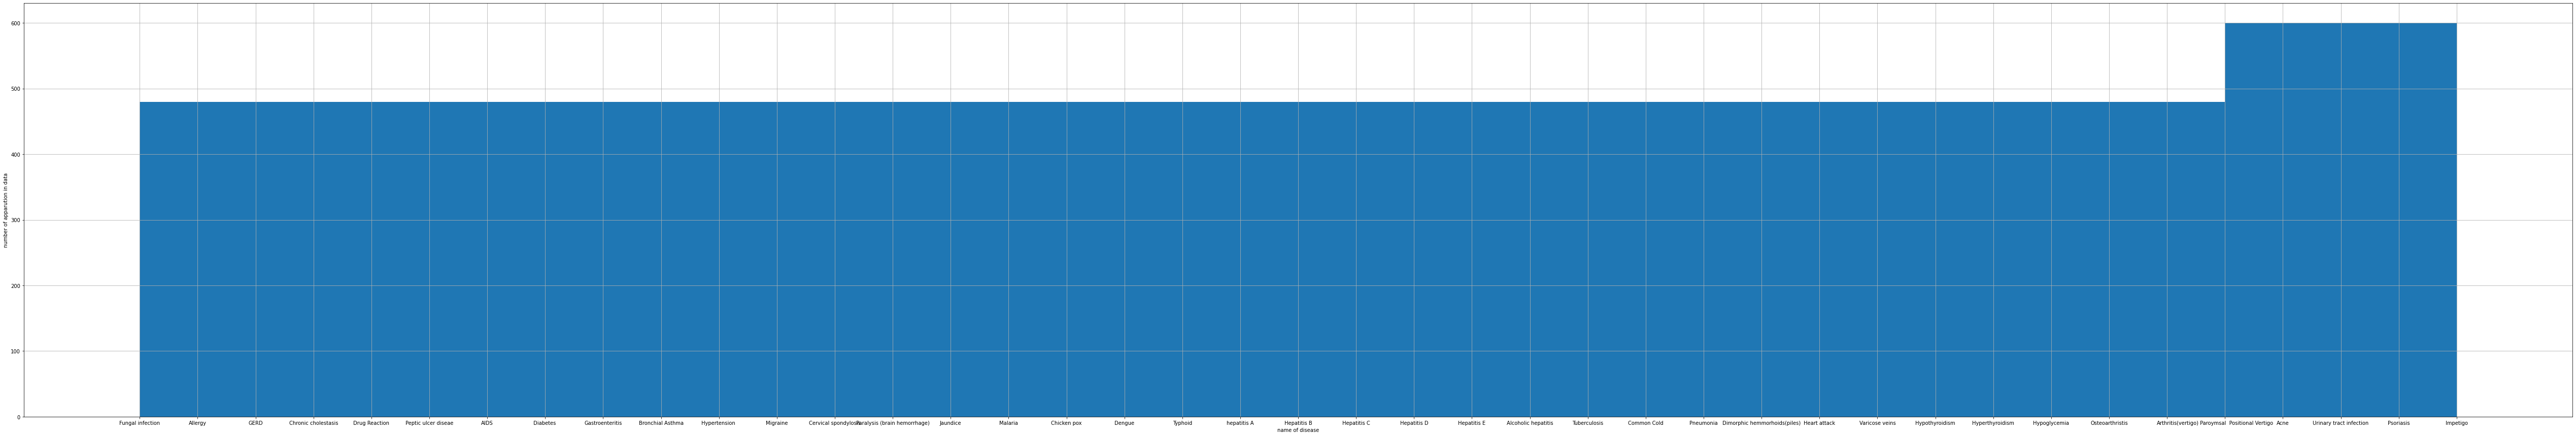

In [ ]:
# this plot is to check if target is balance

fig = plt.figure(figsize=(90, 15))
ax = fig.gca()
data["Disease"].hist(ax =ax)
plt.ylabel("number of apparution in data")
plt.xlabel("name of disease")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd27ce31950>]],
      dtype=object)

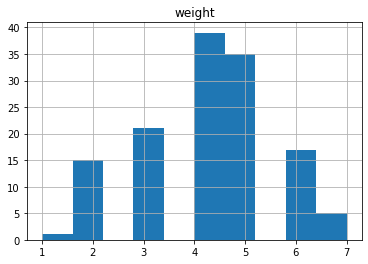

In [ ]:
data_severity.hist()

In [ ]:
data_severity["weight"].unique()

array([1, 3, 4, 5, 6, 2, 7])

In [ ]:
ds_Su=data_severity["Symptom"].unique()
print(ds_Su)
# convert numpy array to dictionary
d = dict(enumerate(ds_Su.flatten(), 1))
d = {value:key for key, value in d.items()}
d

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_s

{'itching': 1,
 'skin_rash': 2,
 'nodal_skin_eruptions': 3,
 'continuous_sneezing': 4,
 'shivering': 5,
 'chills': 6,
 'joint_pain': 7,
 'stomach_pain': 8,
 'acidity': 9,
 'ulcers_on_tongue': 10,
 'muscle_wasting': 11,
 'vomiting': 12,
 'burning_micturition': 13,
 'spotting_urination': 14,
 'fatigue': 15,
 'weight_gain': 16,
 'anxiety': 17,
 'cold_hands_and_feets': 18,
 'mood_swings': 19,
 'weight_loss': 20,
 'restlessness': 21,
 'lethargy': 22,
 'patches_in_throat': 23,
 'irregular_sugar_level': 24,
 'cough': 25,
 'high_fever': 26,
 'sunken_eyes': 27,
 'breathlessness': 28,
 'sweating': 29,
 'dehydration': 30,
 'indigestion': 31,
 'headache': 32,
 'yellowish_skin': 33,
 'dark_urine': 34,
 'nausea': 35,
 'loss_of_appetite': 36,
 'pain_behind_the_eyes': 37,
 'back_pain': 38,
 'constipation': 39,
 'abdominal_pain': 40,
 'diarrhoea': 41,
 'mild_fever': 42,
 'yellow_urine': 43,
 'yellowing_of_eyes': 44,
 'acute_liver_failure': 45,
 'fluid_overload': 46,
 'swelling_of_stomach': 47,
 'swelle

In [ ]:
len(ds_Su)

132

In [ ]:
"""
data_dict = data_severity.set_index('Symptom').T.to_dict()
len(data_dict)
data_dict
"""

"\ndata_dict = data_severity.set_index('Symptom').T.to_dict()\nlen(data_dict)\ndata_dict\n"

In [ ]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

In [ ]:
new_df = remove_space_between_word(data)
new_df.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo)_Paroymsal__Positional_Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary_tract_infection,burning_micturition,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def encode_data(dataset , data_dict_weigth):
    cols = dataset.columns
    for columnName in cols:
        for i in range(len(dataset[columnName])):
            try:
            #print(data_dict[data2[columnName][i]]["weight"])
                dataset[columnName][i] = d[dataset[columnName][i]].values
            except:
                pass
    dataset = dataset.fillna(0) # put empty cell to 0
    """
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    """
    return dataset

In [ ]:
"""
print(data_dict["foul_smell_ofurine"])
print(data_dict["dischromic_patches"])
print(data_dict["spotting_urination"])
"""

'\nprint(data_dict["foul_smell_ofurine"])\nprint(data_dict["dischromic_patches"])\nprint(data_dict["spotting_urination"])\n'

In [ ]:
df = encode_data(new_df , d)
df.tail()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo)_Paroymsal__Positional_Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary_tract_infection,burning_micturition,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if all Symptoms are replace by their weigth
names = []
for col in df.columns:
    if(col != "Disease"):
        for i in range(len(df[col])):
            if (type(df[col][i]) == str ):
                if df[col][i] not in names :
                    names.append(df[col][i])
                    
print(" no replace are :" , names)  


 no replace are : ['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'vomiting', 'indigestion', 'muscle_wasting', 'patches_in_throat', 'fatigue', 'weight_loss', 'sunken_eyes', 'cough', 'headache', 'chest_pain', 'back_pain', 'weakness_in_limbs', 'chills', 'joint_pain', 'yellowish_skin', 'constipation', 'pain_during_bowel_movements', 'breathlessness', 'cramps', 'weight_gain', 'mood_swings', 'neck_pain', 'muscle_weakness', 'stiff_neck', 'pus_filled_pimples', 'burning_micturition', 'bladder_discomfort', 'high_fever', 'nodal_skin_eruptions', 'ulcers_on_tongue', 'loss_of_appetite', 'restlessness', 'dehydration', 'dizziness', 'weakness_of_one_body_side', 'lethargy', 'nausea', 'abdominal_pain', 'pain_in_anal_region', 'sweating', 'bruising', 'cold_hands_and_feets', 'anxiety', 'knee_pain', 'swelling_joints', 'blackheads', 'foul_smell_of_urine', 'skin_peeling', 'blister', 'dischromic__patches', 'watering_from_eyes', 'extra_marital_contacts', 'diarrhoea', 'loss

In [ ]:
x=df.iloc[:,1:19].values
print(x[0:1])
y=df.iloc[:,0:1].values
y

[['itching' 'skin_rash' 'nodal_skin_eruptions' 'dischromic__patches' 0 0
  0 0 0 0 0 0 0 0 0 0 0]]


array([['Fungal_infection'],
       ['Fungal_infection'],
       ['Fungal_infection'],
       ...,
       ['Urinary_tract_infection'],
       ['Psoriasis'],
       ['Impetigo']], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size = 0.70)
randomFC = RandomForestClassifier()
model=randomFC.fit(x_train, y_train)
result = model.predict(x_test)
print(randomFC)
print(classification_report(y_true=y_test, y_pred=result))
print('F1-score% =', f1_score(y_test, result, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, result)*100)

ValueError: ignored

In [ ]:
x_test.shape

In [ ]:
x_test

In [ ]:
df1=pd.read_csv("/content/akash (1).csv")
df1=df1.iloc[:,1:5]
df1

In [ ]:
doctor_dict=df1.set_index('Diseases').T.to_dict()

In [ ]:
def Prediction(val_lst):
  result=model.predict(val_lst)
  return result
  

In [ ]:
x_test[0:1]

In [ ]:
lst=Prediction([[3, 7, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
doctor_dict[lst[0]]
